In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
df = pd.DataFrame(index=["coal","gas OCGT","gas CCGT","nuclear"])

r = 0.05

df["capital cost"] = [1200,400,800,6000] #EUR/kW
df["lifetime"] = [40,30,30,40]  #a
df["fixed O&M"] = [30,15,20,0] #EUR/kW/a
df["annuity"] = [df.at[t,"capital cost"]*1000*r/(1-(1+r)**(-df.at[t,"lifetime"])) for t in df.index] #EUR/MW/a
df["total fixed"] = df["annuity"] + 1000*df["fixed O&M"] #EUR/MW/a
df["marginal cost"] = [32,54,37,16] #EUR/MW/h

In [49]:
x = np.arange(0.1,1.01,0.02)

lcoe = pd.DataFrame(index=x)
for t in df.index:
    lcoe[t] = [df.at[t,"total fixed"]/(i*8760) + df.at[t,"marginal cost"] for i in lcoe.index]

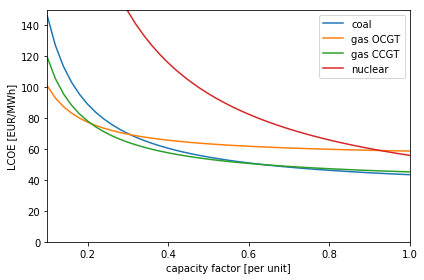

In [52]:
fig, ax = plt.subplots()

fig.set_size_inches(6,4)

lcoe.plot(ax=ax)
    
ax.set_ylim([0,150])
ax.set_ylabel("LCOE [EUR/MWh]")
ax.set_xlabel("capacity factor [per unit]")

fig.tight_layout()

fig.savefig("lcoe_cf.pdf",transparent=True)